<h1>IndabaX Tanzania Mobile Banking Prediction Challenge by Tanzania IndabaX 2021 <h1><h2>by XVIII_6@zindi<h2>


<h2>OBJECTIVE OF THE CHALLENGE <h2>
<h4>The objective of this challenge is to build a machine learning model to predict which individuals across Africa and around the world use mobile or internet banking<h4>


<h2>IMPORTING THE IMPORTANT LIBRARIES <h2>


In [1]:
#Start by importing the modules 
import pandas as pd 
import numpy as np 
import os 
import sys 
import gc 
import random 
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import lightgbm as lgb  
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.metrics import auc
from sklearn.metrics  import  roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')









<h2>LOADING THE DATA FROM CSV FILE  <h2>


In [2]:
#Here loading the file from csv ,that is train,test,and sub and vd 
pd.set_option('display.max_columns',50000) #this code help to display the  full columns and rows of the data in cell
pd.set_option('display.max_rows',None)  #
pd.set_option('display.width',70000)     #

#read the train ,test,sub and variable definition.
train=pd.read_csv('train1.csv')
test=pd.read_csv('test1.csv')
sub=pd.read_csv('SampleSubmission1.csv')
vd=pd.read_csv('VariableDefinitions1.csv')




<h2>EXPLORE THE DATA <h2>

In [3]:
#check the train data file for the first 5 above data 
train.head()



,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0


In [4]:
#check the test data file for the first 5 above data 
test.head()


,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37
0,ID_000YI58E,39,2,22.0,2,NaN,NaN,2,NaN,1.0,NaN,1,2,2,2.0,2,2,2,1,2,2.0,2,2.0,2.0,NaN,1,1,NaN,2.0,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0
1,ID_001SP4JF,30,2,62.0,1,NaN,NaN,2,NaN,1.0,1.0,2,1,2,2.0,2,2,2,2,2,NaN,2,NaN,2.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,1.0,1.0,1.0,1.0,0
2,ID_001VOF6S,65,4,35.0,2,1.0,NaN,1,1.0,NaN,1.0,2,2,2,NaN,2,2,2,2,2,NaN,1,NaN,NaN,2.0,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0
3,ID_0030LULG,123,0,24.0,2,1.0,NaN,2,NaN,1.0,1.0,1,2,2,2.0,2,1,2,2,2,NaN,2,1.0,2.0,2.0,2,2,NaN,2.0,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1
4,ID_0037PZ3R,67,2,25.0,2,NaN,NaN,1,NaN,NaN,2.0,2,1,2,NaN,2,2,2,1,1,NaN,3,NaN,2.0,2.0,1,2,2.0,NaN,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,1


In [5]:
#check the sub file 
sub.head()


,ID,Target
0,ID_000YI58E,NaN
1,ID_001SP4JF,NaN
2,ID_001VOF6S,NaN
3,ID_0030LULG,NaN
4,ID_0037PZ3R,NaN


In [6]:
#check the variable definitions file to gain more understanding 
vd 


,ID,Person unique/random identification
0,country_code,The country codes
1,region,"Region_codes of a given country,.i.e., South A..."
2,age,Individual age
3,FQ1,Has ATM/debit card
4,FQ2,Is the ATM connected to an account with your n...
5,FQ3,Purchased with the ATM
6,FQ4,Has a credit card
7,FQ5,Used the credit card in 12 months
8,FQ6,Money deposits to a bank account in the last 1...
9,FQ7,Money withdrawals from a bank account in the l...


In [7]:
#check the information like data type of the train data file 
train.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

In [8]:
#check information like datatype  of the test data file 
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46477 entries, 0 to 46476
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            46477 non-null  object 
 1   country_code  46477 non-null  int64  
 2   region        46477 non-null  int64  
 3   age           46348 non-null  float64
 4   FQ1           46477 non-null  int64  
 5   FQ2           20801 non-null  float64
 6   FQ3           19928 non-null  float64
 7   FQ4           46477 non-null  int64  
 8   FQ5           8913 non-null   float64
 9   FQ6           25878 non-null  float64
 10  FQ7           25917 non-null  float64
 11  FQ8           46477 non-null  int64  
 12  FQ9           46477 non-null  int64  
 13  FQ10          46477 non-null  int64  
 14  FQ11          35912 non-null  float64
 15  FQ12          46477 non-null  int64  
 16  FQ13          46477 non-null  int64  
 17  FQ14          46477 non-null  int64  
 18  FQ15          46477 non-nu

In [ ]:
#checking for the missing values in the train data file 
train.isnull().sum()




In [10]:
#check for the missing values in the test data file 
test.isnull().sum()



ID                  0
country_code        0
region              0
age               129
FQ1                 0
FQ2             25676
FQ3             26549
FQ4                 0
FQ5             37564
FQ6             20599
FQ7             20560
FQ8                 0
FQ9                 0
FQ10                0
FQ11            10565
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ17            41599
FQ18                0
FQ19            20357
FQ20            10456
FQ21            10500
FQ22                0
FQ23                0
FQ24            29912
FQ35            35425
FQ36            41577
FQ25                0
FQ26                0
FQ27            45034
FQ28            45846
FQ29            10601
FQ30            45601
FQ31            46113
FQ32            20477
FQ33                0
FQ34            13341
FQ37                0
dtype: int64

<h2>DATA VISUALIZATION <h2>


Text(0.5, 1.0, 'Distribution of the target')

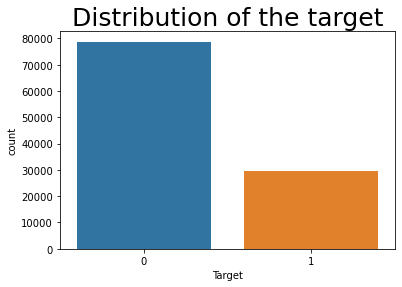

In [11]:
#here use graph to check the ditribution of the target 
sns.countplot(train.Target)
plt.title('Distribution of the target', fontdict={'size':25})



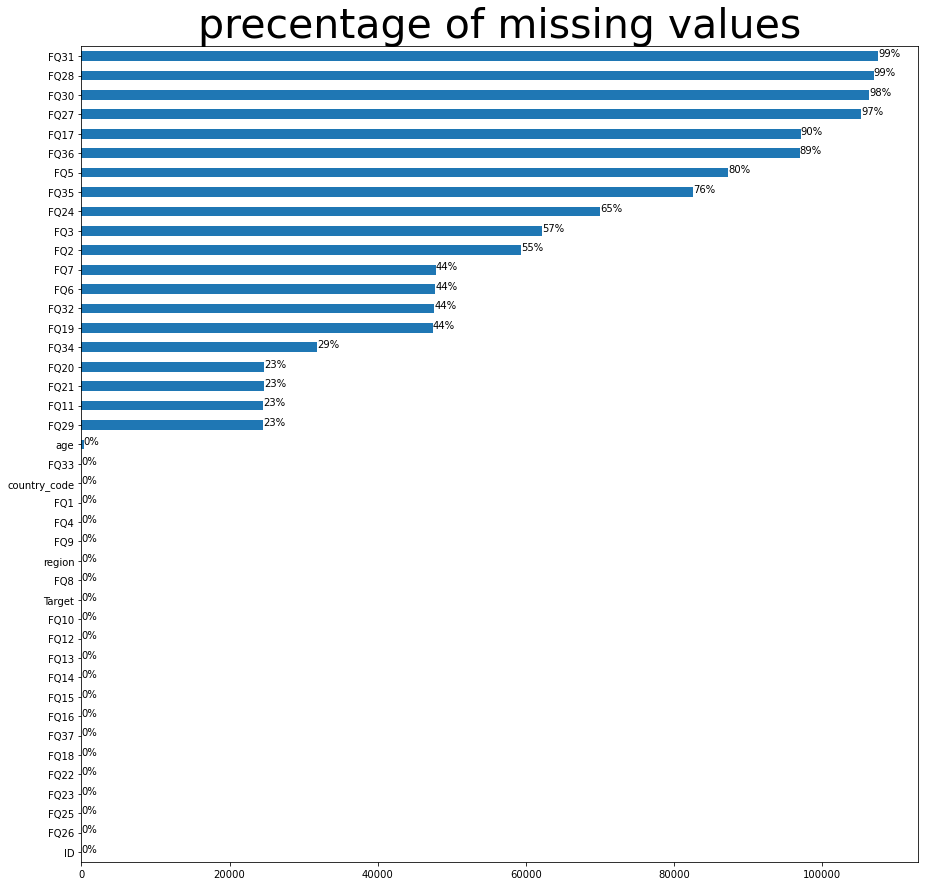

In [12]:
#Also continue to check for missing values in the train data file by using graph to gain insight 
graph= train.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('precentage of missing values', fontdict={'size':41})
for p in graph.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))
    


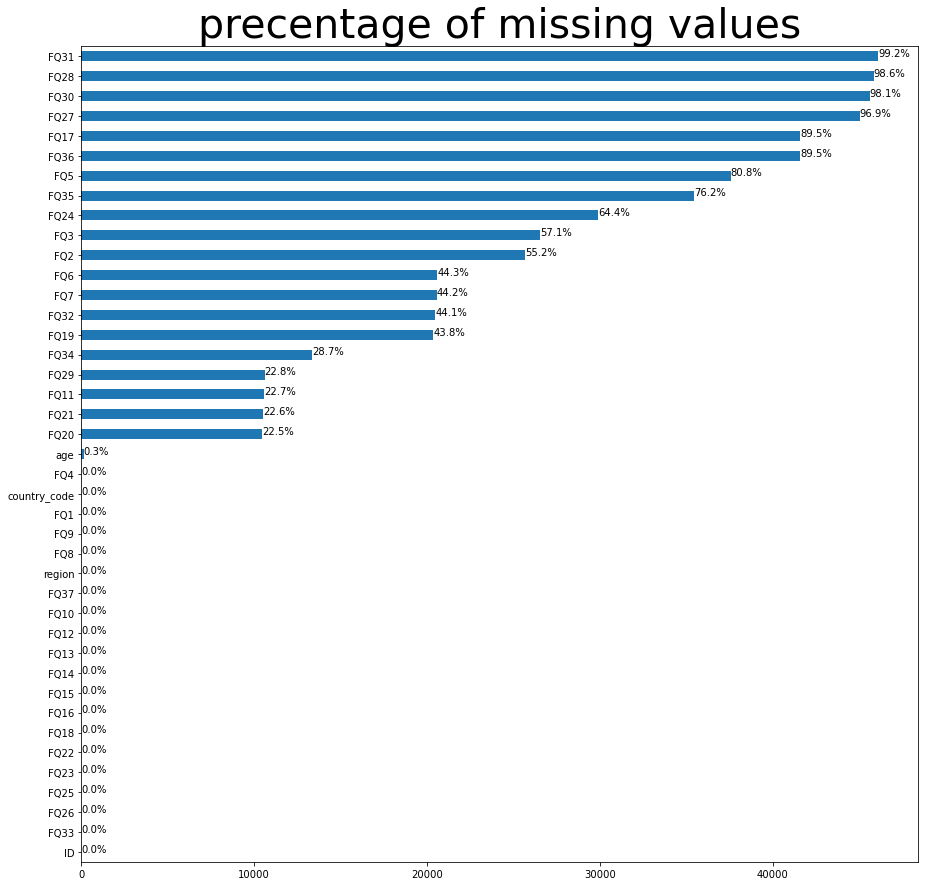

In [13]:
#Also continue to check for missing values in the test data file by using graph to gain insight
graph = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (15, 15))
plt.title('precentage of missing values', fontdict={'size':41})

for p in graph.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    plt.annotate(percentage,(x,y))
    

<h2>DATA CLEANING UP  <h2>

<h4>Since from data visualization and exploration  there a lot of nan values so cleaning for better modelling  <h4>

In [9]:
#Here data cleaning up by using function  clean and dirt rate and droping the columns with more dirt rate 
def clean(train,thresh) :
  def dirt_rate(train,col) :
    return train[col].isna().sum() / train.shape[0]

  for col in train.columns : 
    if dirt_rate(train,col) >= thresh :
      train.drop(col,axis=1,inplace=True)
  return train
  
#calling the function clean to clean and drop the data with more nans values from the train data and set the test data 
train = clean(train,thresh=0.8)
test = test[train.columns[:-1]]




<h2>DATA IMPUTING FOR OTHER NANS VALUES <h2>

In [10]:
#As still there are missing values so here we imputing those missing values  by using the function impute columns 
def imputeColumns(train ,test) :
  total = pd.concat([train,test]) #here we concat the train and  test data to form the total data for easily computing and imputing of the nans values 
  total['age'].fillna(total.age.mean(),inplace=True) #filling the nans values in age columns by using the mean 
  FQ = total.filter(like= 'FQ').columns
  for cl in FQ :
    total[cl] = total[cl].fillna(-1)   #filling the nans values in other columns by -1 
  total[FQ] = total[FQ].astype('int')  #changing the data type to int 
  # get train - test
  train = total[total['ID'].isin(train['ID'].unique())]  #get train from total data 
  train['Target'] = train['Target'].astype('int')
  test = total[~total['ID'].isin(train['ID'].unique())] #get the test data from the total data 
  return train , test  #return the clean test and train 




In [ ]:
#Calling the function imputeColumns to clean and perform the above work 
train , test =imputeColumns(train , test)

In [12]:
#Explore the train data 
train.head()

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,-1,-1,2,-1,1,2,1,1,2,2,2,2,2,2,2,4,2,1,1,2,-1,1,2,2,1,-1,1,1,0,0
1,ID_000QLXZM,32,7,70.0,2,-1,-1,2,-1,1,2,2,2,2,2,2,2,2,2,1,3,2,1,1,2,-1,-1,1,1,2,-1,1,2,0,0
2,ID_001728I2,71,7,22.0,2,1,-1,2,-1,1,2,2,2,4,2,2,1,2,1,1,-1,2,2,1,2,-1,-1,2,1,2,-1,2,1,1,0
3,ID_001R7IDN,48,3,27.0,1,-1,-1,2,2,-1,2,1,1,2,2,2,2,2,2,1,1,1,-1,1,2,-1,-1,2,2,-1,2,1,1,1,0
4,ID_0029QKF8,25,0,79.0,2,-1,-1,2,-1,-1,2,2,1,2,2,2,2,2,1,1,-1,2,2,1,1,2,-1,2,2,2,2,1,1,1,0


In [18]:
#check if there is other nans values in clumns in train data 
train.isnull().sum()

ID              0
country_code    0
region          0
age             0
FQ1             0
FQ2             0
FQ3             0
FQ4             0
FQ6             0
FQ7             0
FQ8             0
FQ9             0
FQ10            0
FQ11            0
FQ12            0
FQ13            0
FQ14            0
FQ15            0
FQ16            0
FQ18            0
FQ19            0
FQ20            0
FQ21            0
FQ22            0
FQ23            0
FQ24            0
FQ35            0
FQ25            0
FQ26            0
FQ29            0
FQ32            0
FQ33            0
FQ34            0
FQ37            0
Target          0
dtype: int64

In [18]:
#check if there is other missing values in clumns in test data 
test.isnull().sum()

ID                  0
country_code        0
region              0
age                 0
FQ1                 0
FQ2                 0
FQ3                 0
FQ4                 0
FQ6                 0
FQ7                 0
FQ8                 0
FQ9                 0
FQ10                0
FQ11                0
FQ12                0
FQ13                0
FQ14                0
FQ15                0
FQ16                0
FQ18                0
FQ19                0
FQ20                0
FQ21                0
FQ22                0
FQ23                0
FQ24                0
FQ35                0
FQ25                0
FQ26                0
FQ29                0
FQ32                0
FQ33                0
FQ34                0
FQ37                0
Target          46477
dtype: int64

In [19]:
#Explore the shape of the train,test and sub 
train.shape,sub.shape,test.shape 

((108446, 35), (46477, 2), (46477, 35))

<h2>BUILDING THE MODEL <h2>

In [13]:
#Creating the class to capture the  hyperparameter and droping the other unnecesary feature from the data 
class model:
  seedNumber = 42
  n_splits = 5
  remove_features = ['ID', 'country','Target']  #These are the unneccesary columns are to be removed 
  categorical_features = ['country_code','region']  #Categorical features from the data set 
  TARGET_COL = 'Target'
  params = {'boosting_type':  #Hypertuning the parameter to gain more efficiency of the model 
                'gbdt','objective': 
                'binary','metric': 'auc',
                'n_estimators': 500,
                'colsample_bytree' : 0.8,
                'seed': 42,
                'silent':False,
                'early_stopping_rounds': 100, 
                'learning_rate' :0.1
               }
def random_stateNumber(state):
    random.seed(state)
    np.random.seed(state)
random_stateNumber(model.seedNumber)
features_columns = [col for col in train.columns if col not in model.remove_features]




In [14]:
#train the model by using the function  region to train the regions one by one in a data set 
def region(X,y,Test,skf,reg) :
  oof_lgb = np.zeros((X.shape[0],))
  Test['target'] = 0
  lgb_preds = []
  for fold_, (trn_idx, val_idx) in enumerate(skf.split(X, X.country_code)):
      tr_x, tr_y = X.iloc[trn_idx,:], y[trn_idx] 
      vl_x, vl_y = X.iloc[val_idx,:], y[val_idx] 
      data_train = lgb.Dataset(tr_x, label=tr_y,categorical_feature=model.categorical_features)
      data_valid= lgb.Dataset(vl_x, label=vl_y,categorical_feature=model.categorical_features)
      estimator = lgb.train(model.params,data_train,valid_sets = [data_train,data_valid ],verbose_eval = 0)
      y_pred_val = estimator.predict(vl_x,num_iteration=estimator.best_iteration)
      oof_lgb[val_idx] = y_pred_val
      y_pred_test = estimator.predict(Test[features_columns],num_iteration=estimator.best_iteration)
      lgb_preds.append(y_pred_test)
  print(f'Region[{reg}] AUC : ',roc_auc_score(y, oof_lgb))
  return np.mean(lgb_preds,axis=0) , oof_lgb



In [15]:
#Then ,here i continue training the model to get the predictions for the validation set 
def continue_training() :
  train_ids = [] ; test_ids = [] ;
  train_target = [] ;custom_preds = [] ; test_preds = [] ;
  for reg in tqdm_notebook(np.sort(train.region.unique())) :
    skf = StratifiedKFold(n_splits=model.n_splits,shuffle=True, random_state=model.seedNumber)
    train_ = train[train['region']==reg].reset_index(drop=True)
    Test = test[test['region']==reg].reset_index(drop=True)
    train_ids.extend(train_['ID'].values.tolist()) ; test_ids.extend(Test['ID'].values.tolist())
    X , y   = train_[features_columns] , train_[model.TARGET_COL]
    test_pred , oof_pred =region(X,y,Test,skf,reg=reg)
    train_target.extend(y) ; custom_preds.extend(oof_pred) ; test_preds.extend(test_pred)
  return train_ids , custom_preds ,train_target ,test_ids, test_preds
train_ids , oof_preds ,train_target ,test_ids, test_preds = continue_training()




  0%|          | 0/9 [00:00<?, ?it/s]

core -0.950048
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3595, number of negative: 9314
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 12909, number of used features: 32
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.278488 -> initscore=-0.951975
[LightGBM] [Info] Start training from score -0.951975
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 3581, number of negative: 9328
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [16]:
#Evaluate the model by using the area under the curve from the metrics module 
complete = pd.DataFrame({'ID' :train_ids ,'OOF_lgbm' :oof_preds , 'Target' :train_target})
print(f'AUC : ',roc_auc_score(complete['Target'], complete['OOF_lgbm'])) 
Submission = pd.DataFrame({'ID' :test_ids ,'Target' :test_preds})



AUC :  0.5106097034761855


In [17]:
#Complete and submit the files 
Submission.to_csv('sub3.csv',index=False)




